In [1]:
import pandas as pd
import geopandas as gpd

<h4>행정동 별 총 생활인구수 평균</h4>

In [2]:
person = pd.read_csv("data/생활인구.csv", encoding = "euc-kr")
person.head()

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20230311,0,11110515,15288.0308,637.2545,406.0597,514.3553,395.4879,393.2354,417.8250,...,446.6307,512.9693,635.9598,747.4487,898.0986,596.0410,682.0904,505.3230,373.9977,1190.6617
1,20230311,0,11110530,13241.1642,388.8367,172.8164,172.9749,308.3220,454.7502,558.7610,...,533.9643,502.1803,693.6297,507.0514,666.9163,597.9375,549.2142,423.9840,302.7966,954.0461
2,20230311,0,11110540,3696.7589,86.7686,66.4854,274.9982,272.6350,135.4139,120.9320,...,98.5123,99.7347,150.8929,180.8845,169.2661,106.0102,107.8493,160.5952,126.1365,256.3056
3,20230311,0,11110550,14038.6014,411.3376,318.9457,481.9034,410.2701,382.9175,307.3315,...,428.6219,359.1551,501.2929,579.5095,770.5700,561.5204,663.2390,507.5252,417.8794,1182.5537
4,20230311,0,11110560,18511.8215,645.6210,466.9987,488.3059,537.0432,430.2506,375.6162,...,484.4500,455.7169,671.7420,722.3928,866.7986,828.8403,993.1646,859.8048,651.8762,1601.3981


In [3]:
person_data = person[person["기준일ID"] == 20230311].loc[:, ["시간대구분", "행정동코드", "총생활인구수"]]
person_data = person_data.groupby("행정동코드").mean().drop("시간대구분", axis = 1).reset_index()
person_data

,행정동코드,총생활인구수
0,11110515,18604.089171
1,11110530,20501.175912
2,11110540,6712.051292
3,11110550,13470.659083
4,11110560,18894.383712
...,...,...
419,11740650,24536.131729
420,11740660,27226.149529
421,11740685,56962.790096
422,11740690,4553.881833


<h4>행정동코드 동명 변환 테이블</h4>
<h6>근데 이거 필요한가...?</h6>

In [4]:
dongcode = pd.read_excel("data/KIKcd_H.20210705.xlsx")
dongcode.drop("말소일자", axis = 1, inplace = True)
dongcode.dropna(inplace = True)
dongcode = dongcode.iloc[:, [0, 3]]
dongcode

,행정동코드,읍면동명
2,1111051500,청운효자동
3,1111053000,사직동
4,1111054000,삼청동
5,1111055000,부암동
6,1111056000,평창동
...,...,...
3847,5013058000,서홍동
3848,5013059000,대륜동
3849,5013060000,대천동
3850,5013061000,중문동


In [5]:
dongcode["행정동코드"] = dongcode["행정동코드"].astype(str).str[:-2]
dongcode

,행정동코드,읍면동명
2,11110515,청운효자동
3,11110530,사직동
4,11110540,삼청동
5,11110550,부암동
6,11110560,평창동
...,...,...
3847,50130580,서홍동
3848,50130590,대륜동
3849,50130600,대천동
3850,50130610,중문동


<h4>상권코드 행정동코드 변환 테이블</h4>

In [6]:
commercial_distinct_code = gpd.read_file("data/TBGIS_TRDAR_RELM.shp")
commercial_distinct_code.head()

,STDR_YM_CD,TRDAR_SE_C,TRDAR_SE_1,TRDAR_NO,TRDAR_NM,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,ADSTRD_CD,geometry
0,202112,A,골목상권,2110753,시흥동 은행나무사거리,191934.0,438813.0,11545,11545710,"POLYGON ((192008.560 438553.170, 191987.740 43..."
1,202112,A,골목상권,2110427,노원 을지대학교병원,206265.0,459431.0,11350,11350611,"POLYGON ((206296.880 459321.710, 206238.710 45..."
2,202112,A,골목상권,2110755,동일여자고등학교,192300.0,439070.0,11545,11545680,"POLYGON ((192443.040 439028.230, 192507.940 43..."
3,202112,A,골목상권,2110739,시흥3동 우편취급국,191289.0,438014.0,11545,11545690,"POLYGON ((191390.840 437878.790, 191371.650 43..."
4,202112,A,골목상권,2111017,송파나루역 3번,210222.0,445516.0,11710,11710562,"POLYGON ((210354.670 445450.290, 210314.560 44..."


In [7]:
commerciar_dong_table = commercial_distinct_code.loc[:, ["TRDAR_NO", "ADSTRD_CD"]]

In [8]:
commerciar_dong_table.head()

,TRDAR_NO,ADSTRD_CD
0,2110753,11545710
1,2110427,11350611
2,2110755,11545680
3,2110739,11545690
4,2111017,11710562


<h4>동별 상권 분기 매출 평균</h4>

In [9]:
sales = pd.read_csv("data/상권 추정매출.csv", encoding = "euc-kr")
sales.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,626851391,25502,...,157,15667,7253,108,1098,2013,4344,7792,7568,28
1,2021,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,122957138,12039,...,0,6679,4293,52,926,1222,2698,3404,2670,9
2,2021,1,A,골목상권,2110001,이북5도청사,CS100009,호프-간이주점,5093349,177,...,9,124,36,0,0,9,18,62,71,3
3,2021,1,A,골목상권,2110001,이북5도청사,CS100010,커피-음료,13507733,1359,...,8,356,881,0,243,260,213,288,235,5
4,2021,1,A,골목상권,2110001,이북5도청사,CS200001,일반교습학원,37551380,128,...,0,56,72,0,0,8,96,8,16,3


In [10]:
sales = sales.loc[:, ["상권_코드", "서비스_업종_코드_명", "분기당_매출_금액", "점포수"]]

In [11]:
sales.head()

,상권_코드,서비스_업종_코드_명,분기당_매출_금액,점포수
0,2110001,한식음식점,626851391,28
1,2110001,분식전문점,122957138,9
2,2110001,호프-간이주점,5093349,3
3,2110001,커피-음료,13507733,5
4,2110001,일반교습학원,37551380,3


In [12]:
sales["상권_코드"] = sales["상권_코드"].astype(int)
commerciar_dong_table["TRDAR_NO"] = commerciar_dong_table["TRDAR_NO"].astype(int)

In [13]:
sales_dong = pd.merge(sales, commerciar_dong_table, left_on = "상권_코드", right_on = "TRDAR_NO", how = "inner").drop("TRDAR_NO", axis = 1)

In [14]:
sales_dong.head()

,상권_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,ADSTRD_CD
0,2110001,한식음식점,626851391,28,11110560
1,2110001,분식전문점,122957138,9,11110560
2,2110001,호프-간이주점,5093349,3,11110560
3,2110001,커피-음료,13507733,5,11110560
4,2110001,일반교습학원,37551380,3,11110560


In [15]:
sales_dong["분기당_매출_금액"] = sales_dong["분기당_매출_금액"].astype(int)


In [16]:
sales_dong = sales_dong.groupby(["ADSTRD_CD", "서비스_업종_코드_명"])["분기당_매출_금액"].mean().reset_index()
sales_dong["분기당_매출_금액"] = sales_dong["분기당_매출_금액"].apply(lambda x: int(float(x)))
sales_dong

,ADSTRD_CD,서비스_업종_코드_명,분기당_매출_금액
0,11110515,가방,36602088
1,11110515,문구,4436782
2,11110515,미곡판매,32294103
3,11110515,미용실,37783792
4,11110515,분식전문점,101174162
...,...,...,...
17095,11740700,한식음식점,1100712356
17096,11740700,한의원,157756865
17097,11740700,호프-간이주점,64151592
17098,11740700,화장품,79408211


<h4>Clustering 수행할 테이블 생성</h4>

In [17]:
person_data.head()

,행정동코드,총생활인구수
0,11110515,18604.089171
1,11110530,20501.175912
2,11110540,6712.051292
3,11110550,13470.659083
4,11110560,18894.383712


In [18]:
sales_dong.head()

,ADSTRD_CD,서비스_업종_코드_명,분기당_매출_금액
0,11110515,가방,36602088
1,11110515,문구,4436782
2,11110515,미곡판매,32294103
3,11110515,미용실,37783792
4,11110515,분식전문점,101174162


In [19]:
person_data["행정동코드"] = person_data["행정동코드"].astype(int)
sales_dong["ADSTRD_CD"] = sales_dong["ADSTRD_CD"].astype(int)

In [20]:
full_table = pd.merge(sales_dong, person_data, left_on = "ADSTRD_CD", right_on = "행정동코드", how = "inner").drop("행정동코드", axis = 1)
full_table.head()

,ADSTRD_CD,서비스_업종_코드_명,분기당_매출_금액,총생활인구수
0,11110515,가방,36602088,18604.089171
1,11110515,문구,4436782,18604.089171
2,11110515,미곡판매,32294103,18604.089171
3,11110515,미용실,37783792,18604.089171
4,11110515,분식전문점,101174162,18604.089171


In [21]:
full_table = full_table.groupby("ADSTRD_CD")[["분기당_매출_금액", "총생활인구수"]].mean().reset_index()
full_table["분기당_매출_금액"] = full_table["분기당_매출_금액"].apply(lambda x: int(float(x)))
full_table

,ADSTRD_CD,분기당_매출_금액,총생활인구수
0,11110515,268930345,18604.089171
1,11110530,647286955,20501.175912
2,11110540,669510538,6712.051292
3,11110550,113185604,13470.659083
4,11110560,199925486,18894.383712
...,...,...,...
396,11740640,477838696,23022.619225
397,11740650,201219050,24536.131729
398,11740660,450624384,27226.149529
399,11740685,376469099,56962.790096


In [22]:
full_table["ADSTRD_CD"] = full_table["ADSTRD_CD"].astype(int)
dongcode["행정동코드"] = dongcode["행정동코드"].astype(int)

In [23]:
full_table = pd.merge(full_table, dongcode, left_on = "ADSTRD_CD", right_on = "행정동코드", how = "inner").drop("ADSTRD_CD", axis = 1)
full_table.head()

,분기당_매출_금액,총생활인구수,행정동코드,읍면동명
0,268930345,18604.089171,11110515,청운효자동
1,647286955,20501.175912,11110530,사직동
2,669510538,6712.051292,11110540,삼청동
3,113185604,13470.659083,11110550,부암동
4,199925486,18894.383712,11110560,평창동


<h3>Clustering</h3>

In [24]:
# 일단 업종 구분 안하고 수행
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
data_scaled = scalar.fit_transform(full_table.drop(["읍면동명", "행정동코드"], axis = 1))

/Users/moonseongyu/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/moonseongyu/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/moonseongyu/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/moonseongyu/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

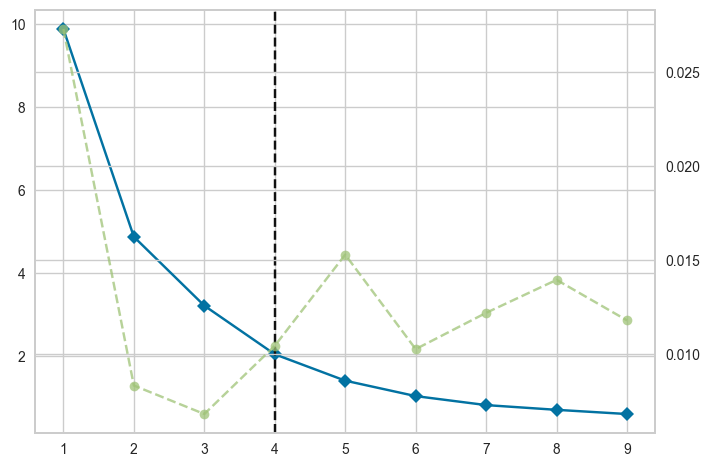

In [25]:
# 클러스터링 최적 개수 확인 위한 elbow method 수행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k = (1, 10))
visualizer.fit(data_scaled)

In [26]:
# elbow method 결과 토대로 k = 4로 클러스터링
k = 4

model = KMeans(n_clusters = k, random_state = 42)
model.fit(data_scaled)
full_table["cluster"] = model.fit_predict(data_scaled)
full_table.head()

/Users/moonseongyu/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/moonseongyu/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,분기당_매출_금액,총생활인구수,행정동코드,읍면동명,cluster
0,268930345,18604.089171,11110515,청운효자동,3
1,647286955,20501.175912,11110530,사직동,3
2,669510538,6712.051292,11110540,삼청동,3
3,113185604,13470.659083,11110550,부암동,3
4,199925486,18894.383712,11110560,평창동,3


<h4>Visualization</h4>

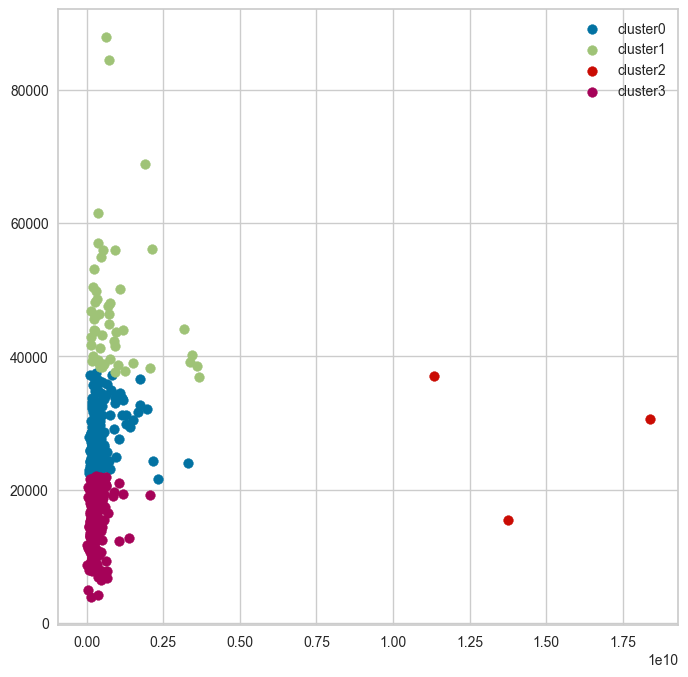

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(full_table.loc[full_table["cluster"] == i, "분기당_매출_금액"],
                full_table.loc[full_table["cluster"] == i, "총생활인구수"],
                label = "cluster" + str(i))
    
plt.legend()
plt.show()

In [28]:
full_table[full_table["cluster"] == 0]["읍면동명"].unique()

array(['혜화동', '명동', '광희동', '이촌제1동', '한남동', '왕십리도선동', '사근동', '옥수동',
       '성수2가제3동', '중곡제4동', '광장동', '자양제1동', '자양제3동', '자양제4동', '구의제1동',
       '구의제2동', '구의제3동', '제기동', '전농제1동', '답십리제1동', '답십리제2동', '장안제1동',
       '장안제2동', '이문제1동', '면목본동', '상봉제2동', '중화제2동', '묵제1동', '신내1동', '삼선동',
       '동선동', '안암동', '길음제1동', '월곡제1동', '월곡제2동', '장위제1동', '석관동', '삼양동',
       '미아동', '송중동', '송천동', '인수동', '창제2동', '창제4동', '방학제1동', '월계1동',
       '하계1동', '중계2.3동', '상계1동', '상계2동', '녹번동', '불광제1동', '갈현제2동', '구산동',
       '응암제1동', '응암제3동', '신사제1동', '북아현동', '충현동', '홍제제1동', '홍은제2동',
       '북가좌제2동', '아현동', '용강동', '대흥동', '서강동', '합정동', '목2동', '신정4동', '염창동',
       '화곡본동', '화곡제8동', '발산제1동', '우장산동', '공항동', '방화제1동', '방화제2동', '신도림동',
       '구로제2동', '구로제3동', '구로제5동', '개봉제1동', '개봉제2동', '수궁동', '독산제1동',
       '시흥제1동', '당산제1동', '당산제2동', '양평제2동', '대림제3동', '상도제4동', '흑석동',
       '사당제1동', '사당제2동', '신대방제1동', '신대방제2동', '성현동', '행운동', '낙성대동', '은천동',
       '인헌동', '남현동', '서원동', '신림동', '조원동', '대학동', '서초1동', '잠원동', '반포1동',
       '방배

In [29]:
full_table[full_table["cluster"] == 1]["읍면동명"].unique()

array(['종로1.2.3.4가동', '한강로동', '화양동', '용신동', '망우본동', '종암동', '공릉1동', '공릉2동',
       '상계6.7동', '대조동', '역촌동', '진관동', '신촌동', '연희동', '공덕동', '서교동', '성산제2동',
       '상암동', '목1동', '목5동', '신정3동', '등촌제3동', '화곡제1동', '가양제1동', '오류제2동',
       '가산동', '영등포동', '여의동', '문래동', '상도제1동', '대방동', '청룡동', '서초2동', '서초3동',
       '반포4동', '양재1동', '논현1동', '압구정동', '청담동', '대치2동', '대치4동', '역삼1동',
       '역삼2동', '세곡동', '방이2동', '문정2동', '위례동', '잠실6동', '강일동', '천호제2동', '길동'],
      dtype=object)

In [30]:
full_table[full_table["cluster"] == 2]["읍면동명"].unique()

array(['원효로제2동', '노량진제1동', '가락1동'], dtype=object)

In [31]:
full_table[full_table["cluster"] == 3]["읍면동명"].unique()

array(['청운효자동', '사직동', '삼청동', '부암동', '평창동', '무악동', '교남동', '가회동',
       '종로5.6가동', '이화동', '창신제1동', '창신제2동', '창신제3동', '숭인제1동', '숭인제2동',
       '소공동', '회현동', '필동', '장충동', '을지로동', '신당동', '다산동', '약수동', '청구동',
       '신당제5동', '동화동', '황학동', '중림동', '후암동', '용산2가동', '남영동', '청파동',
       '원효로제1동', '효창동', '용문동', '이촌제2동', '이태원제1동', '이태원제2동', '서빙고동', '보광동',
       '왕십리제2동', '마장동', '행당제1동', '응봉동', '금호1가동', '금호2.3가동', '금호4가동',
       '성수1가제1동', '성수1가제2동', '성수2가제1동', '송정동', '용답동', '군자동', '중곡제1동',
       '중곡제2동', '중곡제3동', '능동', '자양제2동', '전농제2동', '청량리동', '회기동', '휘경제1동',
       '휘경제2동', '이문제2동', '면목제2동', '면목제4동', '면목제5동', '면목제7동', '면목제3.8동',
       '상봉제1동', '중화제1동', '묵제2동', '망우제3동', '신내2동', '성북동', '보문동', '정릉제1동',
       '정릉제2동', '정릉제3동', '정릉제4동', '길음제2동', '장위제2동', '삼각산동', '우이동', '창제1동',
       '창제3동', '창제5동', '도봉제1동', '도봉제2동', '쌍문제1동', '쌍문제2동', '쌍문제3동',
       '쌍문제4동', '방학제2동', '방학제3동', '월계2동', '중계본동', '중계4동', '상계3.4동',
       '상계5동', '상계9동', '상계10동', '불광제2동', '갈현제1동', '응암제2동', '신사제2동', '증산동',
       '수색